#### Import libraries & read in data

In [14]:
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
data = data = xr. open_dataset('/Users/elizabethpeterson/MEDS/EDS232-labs/Week8/tas_Amon_CanESM5_historical_r10i1p1f1_gn_185001-201412.nc', engine = 'netcdf4')

Explore the data

In [ ]:
data.head()

<xarray.Dataset>
Dimensions:    (time: 5, bnds: 2, lat: 5, lon: 5)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 1850-05-16 12:00:00
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74
  * lon        (lon) float64 0.0 2.812 5.625 8.438 11.25
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/53)
    CCCma_model_hash:            55f484f90aff0e32c5a8e92a42c6b9ae7ffe6224
    CCCma_parent_runid:          rc3.1-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his10
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/5ed65f32-a352-4bd1-83a4-c659b4f...
    variable_id:                 tas
    variant_label:               r10i1p1f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.4.0

In [4]:
print(data)

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/53)
    CCCma_model_hash:            55f484f90aff0e32c5a8e92a42c6b9ae7ffe6224
    CCCma_parent_runid:          rc3.1-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his10
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/5ed65f

In [5]:
print(data.time)

<xarray.DataArray 'time' (time: 1980)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2014, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    height   float64 ...
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time


In [7]:
time = data.time.astype('datetime64[ns]')
print(time)

<xarray.DataArray 'time' (time: 1980)>
array(['1850-01-16T12:00:00.000000000', '1850-02-15T00:00:00.000000000',
       '1850-03-16T12:00:00.000000000', ...,
       '2014-10-16T12:00:00.000000000', '2014-11-16T00:00:00.000000000',
       '2014-12-16T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    height   float64 ...
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time


In [8]:
# select tas variable, store as xarray DataArray
tas = data['tas']

# define min and max bounds for region of interest (new york city!)
lat_min, lat_max = 40, 41.5
lon_min, lon_max = 285.5, 287

In [9]:
# define logical mask: i.e. when lat and long are inside of the valid ranges, it will be true and it will be false everywhere else
tas_NYC_lat = (tas.lat >= lat_min) & (tas.lat <= lat_max)
tas_NYC_lon = (tas.lon >= lon_min) & (tas.lon <= lon_max)

# find only the points where the mask value is true, and drop all other points
tas_NYC = tas.where(tas_NYC_lat & tas_NYC_lon, drop = True)

In [10]:
# take the average over the lat and long dimensions to get a time series
tas_NYC = tas_NYC.mean(dim=['lat','lon'])

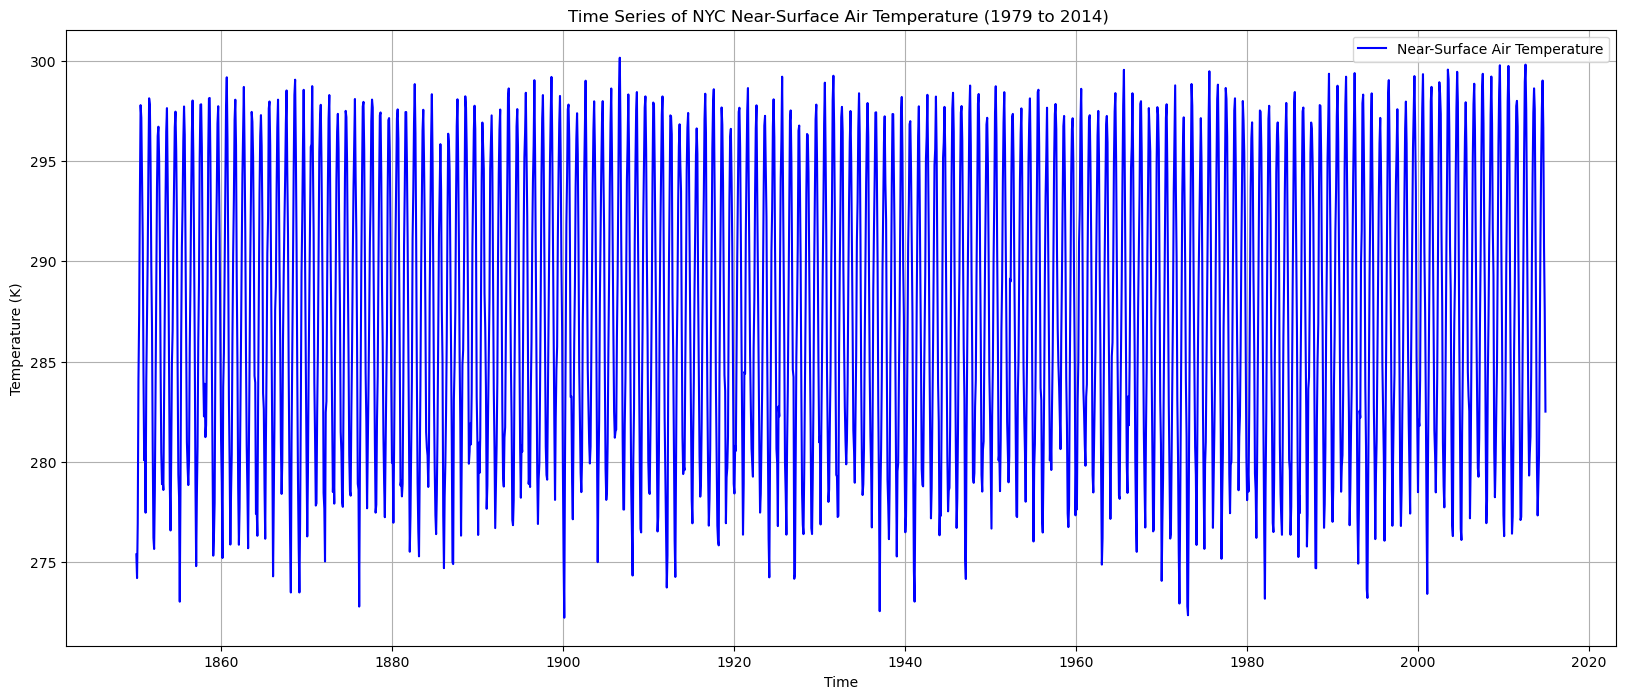

In [15]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tas_NYC, label='Near-Surface Air Temperature', color='b')
ax.set_title("Time Series of NYC Near-Surface Air Temperature (1979 to 2014) ")
ax.set_xlabel("Time")
ax.set_ylabel("Temperature (K)")
ax.legend()
ax.grid()
plt.show()